# ❓ <font color='green'> <u> PROBLEM STATEMENT (Glass Classification) </u>

## 🔵 <font color='blue'> Prepare a model for glass classification using KNN

### <font color='candy'>➡Data Description:
* #### RI : refractive index
* #### Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* #### Mg: Magnesium
* #### AI: Aluminum
* #### Si: Silicon
* #### K: Potassium
* #### Ca: Calcium
* #### Ba: Barium
* #### Fe: Iron

### Type: Type of glass: (class attribute)
#### 1 -- building_windows_float_processed
#### 2 -- building_windows_non_float_processed
#### 3 -- vehicle_windows_float_processed
#### 4 -- vehicle_windows_non_float_processed (none in this database)
#### 5 -- containers
#### 6 -- tableware
#### 7 -- headlamps

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> K - Nearest Neighbour (KNN) </u></font> algorithm is a <u>supervised machine learning</u> algorithm that uses proximity to classify or predict the grouping of a data point. The algorithm can be used to solve both <u>classification and regression</u> problem statements. 
    
+ ### The KNN algorithm creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line and put the new case into the category that is most similar to the available categories.
    
+ ### KNN also called as "lazy learner" because it doesn't learn from the training data immediately. Instead, it stores the dataset and performs an action on it at the time of classification.

+ ### The best choice of k depends upon the data. Generally, larger values of k reduces effect of the noise on the classification, but make boundaries between classes less distinct. So we will select such K value where where both training and testing accuracy are same.

+ ### Distance metrics for KNN include: Euclidean Distance, Manhattan, Minkowski, Hamming Distances.


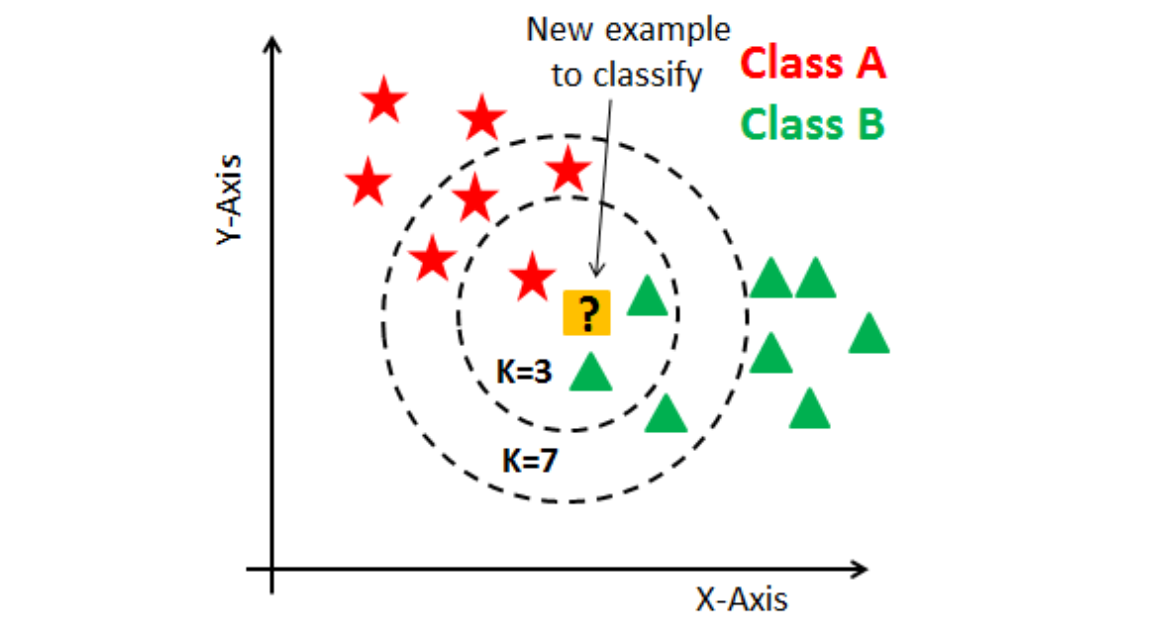

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Datasets_Assignments/main/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(214, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
print( "Total Number of Unique Types = ", df['Type'].nunique())
print( "Total Unique Types = ", df['Type'].unique())

Total Number of Unique Types =  6
Total Unique Types =  [1 2 3 5 6 7]


In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
# Checking for Duplicate Records:
df.duplicated().sum()

1

In [8]:
# Get all duplicated records:
df[df.duplicated(keep = False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
# Drop Duplicated Record:
df.drop_duplicates(inplace= True)
df.duplicated().sum()
df.shape

(213, 10)

> * #### There are 214 records and 10 Variables.
> * #### All variables are of proper data type.
> * #### "Type" is target column.
> * #### There is no null value observed.
> * #### There was one duplicated record present, which is removed.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

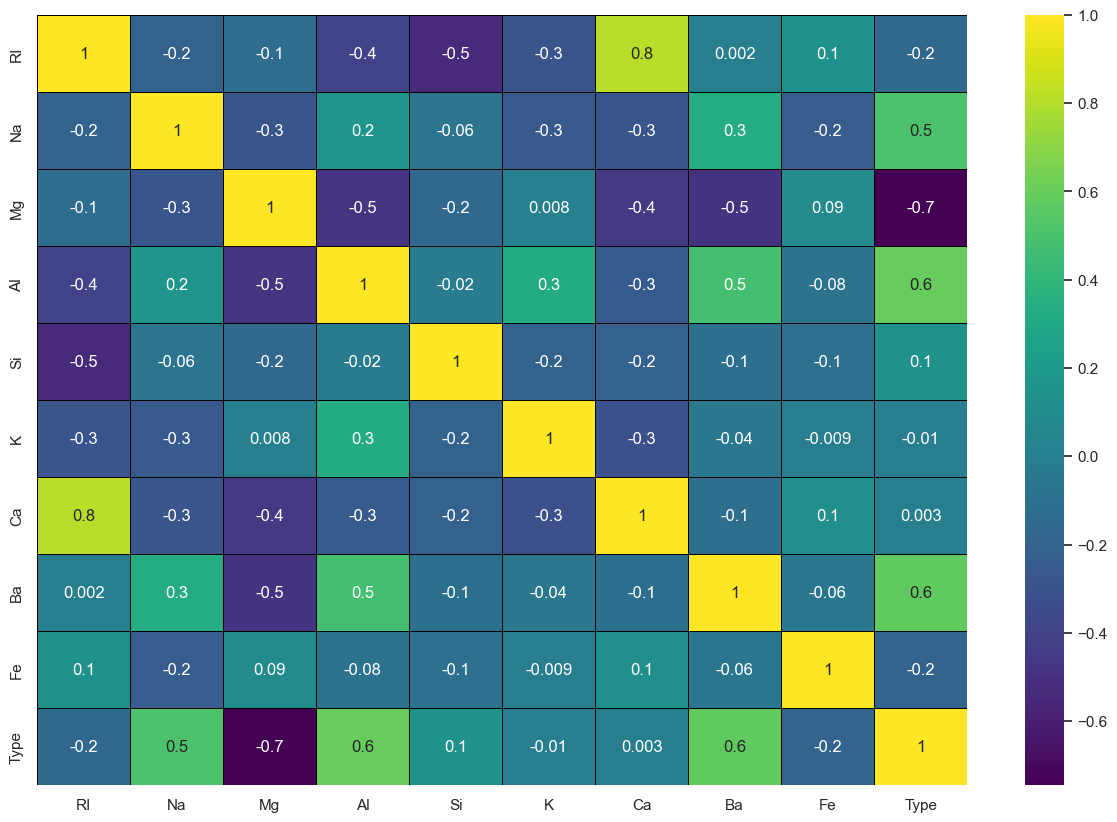

In [10]:
# Correation between Numerical variables:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

<Axes: ylabel='Type'>

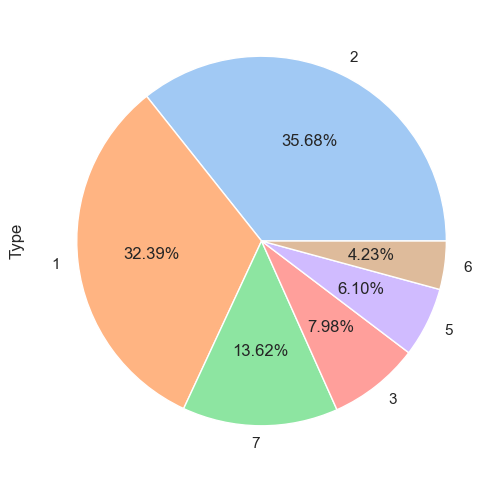

In [11]:
# Plottig Target Variable:
plt.figure(figsize = (8,6))
df['Type'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

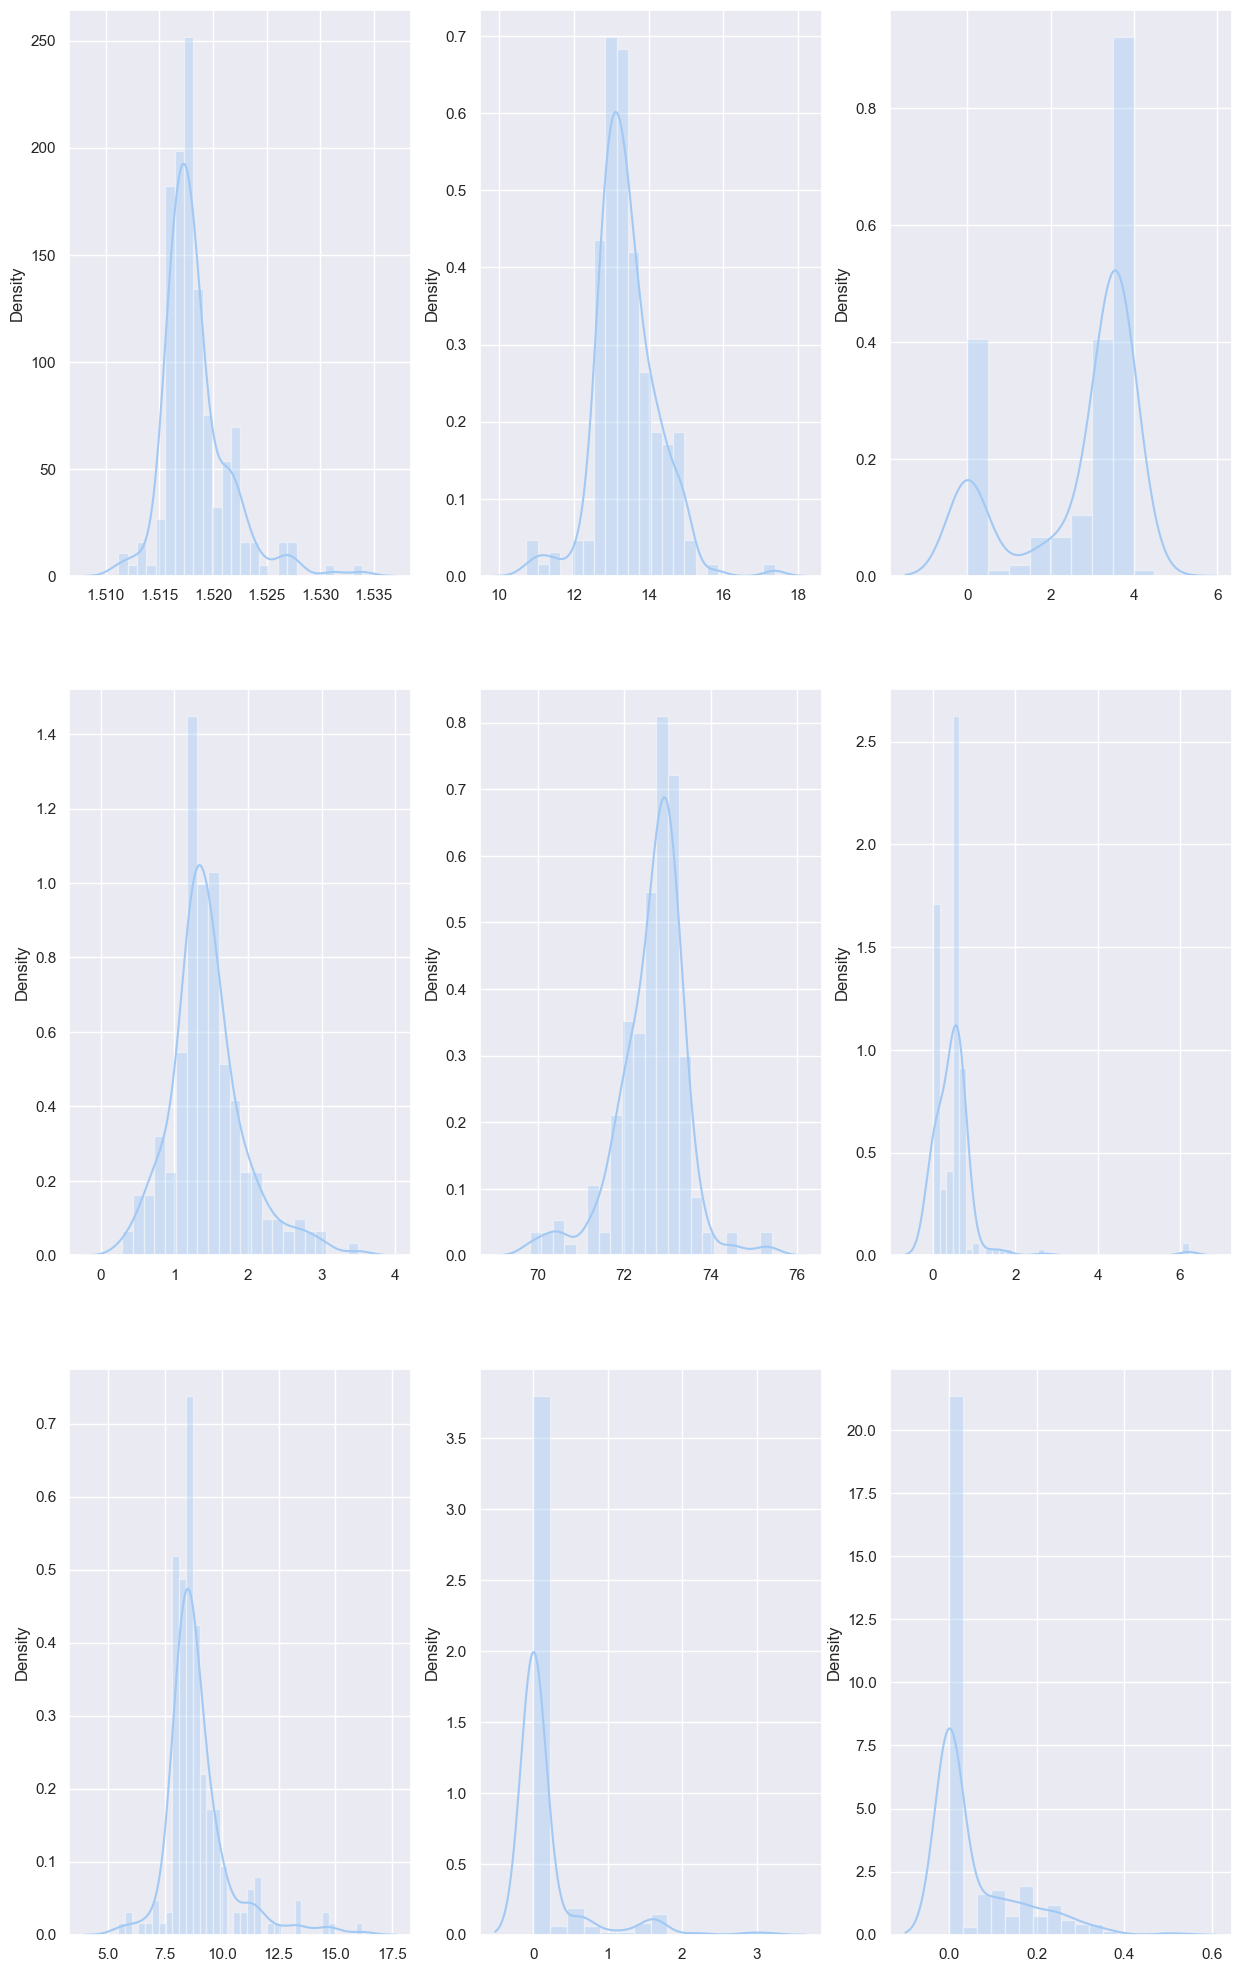

In [12]:
# Barplot for Categorical Variables:
fig, ax =plt.subplots(3,3, figsize=(15,25)) 

sns.distplot(x = df["RI"], ax= ax[0,0])
sns.distplot(x = df["Na"], ax=ax[0,1])
sns.distplot(x = df["Mg"], ax= ax[0,2])

sns.distplot(x = df["Al"], ax= ax[1,0])
sns.distplot(x = df["Si"], ax= ax[1,1])
sns.distplot(x =df["K"], ax= ax[1,2])

sns.distplot(x = df["Ca"], ax= ax[2,0])
sns.distplot(x = df["Ba"], ax= ax[2,1])
sns.distplot(x = df["Fe"], ax= ax[2,2])

plt.show()

<Axes: >

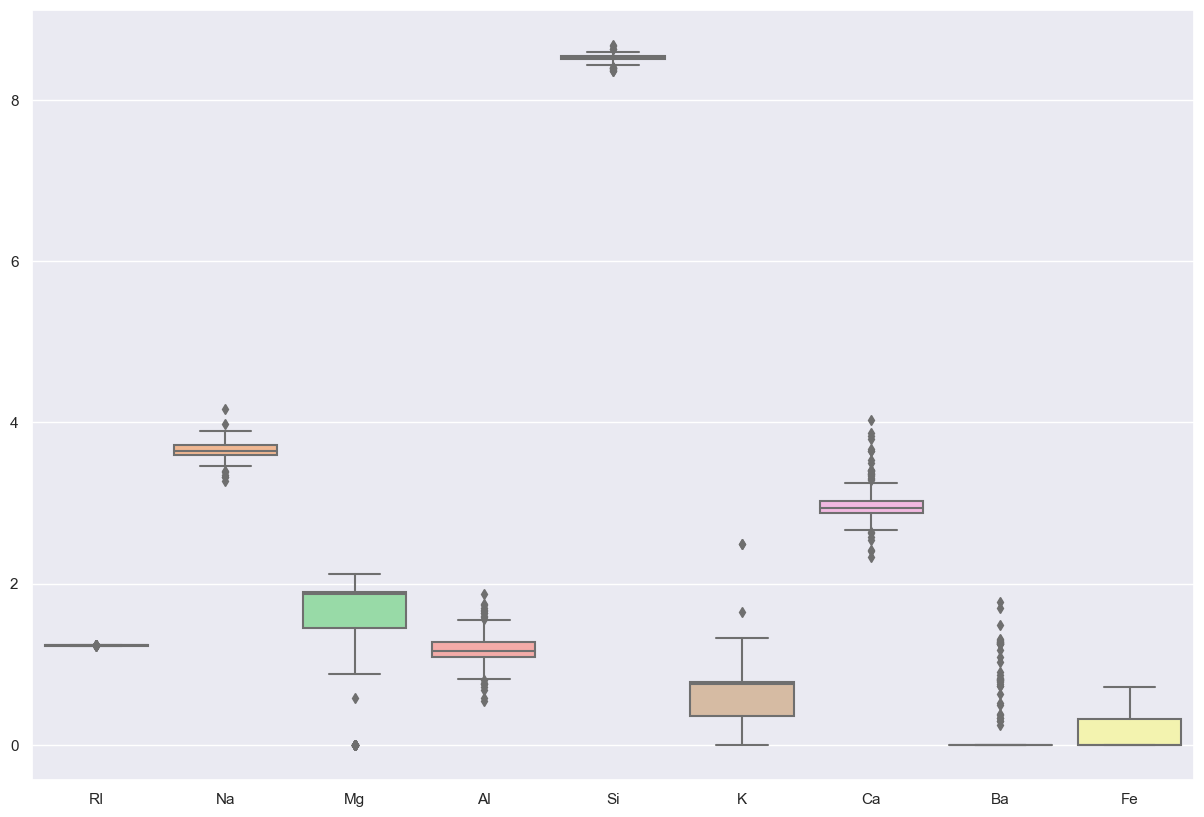

In [13]:
# Boxplot for Numerical Variables:
plt.figure(figsize =(15,10))
box_data = df.drop('Type', axis = 1)
sns.boxplot(np.sqrt(box_data))

> * #### Variables having high positive correlation: "RI" and "Ca", "Type" and "Al", "Type" and "Ba".
> * #### Variables having high negative correlation: "Type" and "Al"
> * #### There are 6 different categories in target variable "Type" and majority data points belongs to type 1 and type 2 category.
> * #### In Distribution chart we can see some variables have moderate to high positive skewness.
> * #### In box plot we observe outliers present in many variables.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

In [14]:
x = df.iloc[:,:-1]
y = df['Type']

### <font color = "green">➡ Standardisation:

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

### <font color = "green">➡ Train Test Split 

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [17]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (159, 9)
Shape of x_test:  (54, 9)
Shape of y_train:  (159,)
Shape of y_test (54,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [18]:
kn = KNeighborsClassifier() # Default neighbors: n_neighbors = 5
kn.fit(xtrain, ytrain)
ypred = kn.predict(xtest)

In [19]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.60      0.92      0.73        13
           2       0.73      0.73      0.73        22
           3       0.00      0.00      0.00         4
           5       0.33      0.33      0.33         3
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.69        54
   macro avg       0.61      0.52      0.53        54
weighted avg       0.68      0.69      0.66        54



In [20]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 68.52%


In [21]:
print(f'Tranning Score: {kn.score(xtrain,ytrain)}')
print(f'Testing Score:{kn.score(xtest,ytest)}')

Tranning Score: 0.7232704402515723
Testing Score:0.6851851851851852


> * #### For default K value i.e 5 Training accuracy is 72% and Testing accuracy is 68%.
> * #### Let's see the accuracies for different number of K by plotting it.

___

* ### <font color = 'blue'> <u> Choosing Optimum Number for K </u>

In [22]:
training_ac = []
testing_ac = []
for i in range(1,30):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(xtrain,ytrain)
    training_ac.append(kn.score(xtrain,ytrain))
    testing_ac.append(kn.score(xtest,ytest))

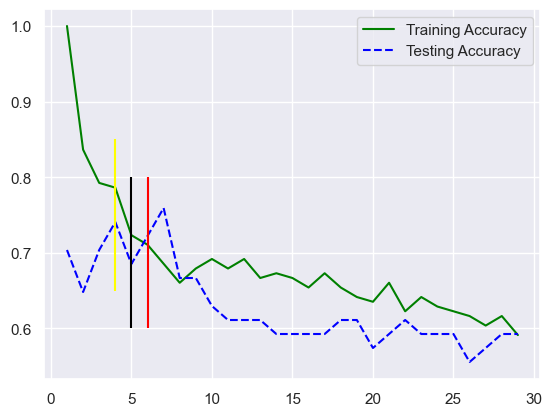

In [23]:
plt.plot(range(1,30), training_ac, linestyle = "-", label = "Training Accuracy", color = "green")
plt.plot(range(1,30), testing_ac, linestyle = "--", label = "Testing Accuracy", color = "blue")
plt.vlines( x = 6 ,ymin = 0.6, ymax = 0.8, color = 'red')
plt.vlines( x = 4 ,ymin = 0.65, ymax = 0.85, color = 'yellow')
plt.vlines( x = 5 ,ymin = 0.6, ymax = 0.8, color = 'black')
plt.legend()

* #### At K = 6 Training and Testing Accuracies are nearly same and also at K = 4 difference in accuracies are low.

### <font color = "green">➡ Model Building For K = 6

In [24]:
# Model for K = 6:
kn = KNeighborsClassifier(n_neighbors = 6)
kn.fit(xtrain, ytrain)
ypred = kn.predict(xtest)

In [25]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.62      1.00      0.76        13
           2       0.76      0.73      0.74        22
           3       1.00      0.25      0.40         4
           5       0.33      0.33      0.33         3
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        54
   macro avg       0.79      0.57      0.60        54
weighted avg       0.77      0.72      0.71        54



In [26]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 72.22%


In [27]:
print(f'Tranning Score: {kn.score(xtrain,ytrain)}')
print(f'Testing Score:{kn.score(xtest,ytest)}')

Tranning Score: 0.710691823899371
Testing Score:0.7222222222222222


### <font color = "green">➡ Model Building For K = 4

In [28]:
# Model for K = 4:
kn = KNeighborsClassifier(n_neighbors = 4)
kn.fit(xtrain, ytrain)
ypred = kn.predict(xtest)

In [29]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84        13
           2       0.70      0.73      0.71        22
           3       1.00      0.25      0.40         4
           5       0.33      0.33      0.33         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.74        54
   macro avg       0.79      0.63      0.66        54
weighted avg       0.77      0.74      0.73        54



In [30]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 74.07%


In [31]:
print(f'Tranning Score: {kn.score(xtrain,ytrain)}')
print(f'Testing Score:{kn.score(xtest,ytest)}')

Tranning Score: 0.7861635220125787
Testing Score:0.7407407407407407


* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### With default K (number of clusters) = 5, we get 72% Training and 68% Testing Accuracy.
> * #### With K = 6 we get nearly same training and testing accuracies i.e. 72%
> * #### With K = 4 we get 78% Training Accuracy and 74% Testing Accuracy. 
> * #### As outliers present in many of our data variables which affects on the final accuracy. 
> * #### Outliers, being data points that deviate significantly from the rest of the data, can distort the distance calculations and, consequently, influence the predictions.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___